In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import random
%matplotlib inline

In [316]:
#Loading the dataset
data = pd.read_csv("world-happiness-report-2021.csv")
data.dropna(axis=1)
data = shuffle(data)


In [317]:
#Setting up the data
df = data.values
X = df[:,6:20]
yOg = df[:,2]
#print(yOg)
#Convert Y to find if a country is happy or not, 
#first find the average happiness of countries
avgHappy = np.mean(yOg)
print(avgHappy)
Y = []
for val in yOg:
    if val < avgHappy:
        Y.append(0)
    else:
        Y.append(1)


5.532838926174495


In [318]:
#Resources used were HW#5 and Lecture Notes
#Setting up neccessary variables
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
#Creating a training set and testing test by pseduo-randomly assigning the sets
X_train = X[0:80]
Y_train = Y[0:80]
print(Y_train)
X_test = X[80:X.shape[0]-1]
Y_test = Y[80:]

[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]


# Logistic Regression

In [319]:
logreg = LogisticRegression(C=.001)

In [320]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=0.001)

In [321]:
#Fix this up later to show accuracy and testing data

yHatLogreg = logreg.predict(X_train)
acc_logreg = logreg.score(X_train, Y_train)
print("Accuracy: %f"% acc_logreg)
w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_
print("W_logreg: ", w_logreg)
print("intercept_logreg ", intercept_logreg)
print("intercept ")

Accuracy: 0.825000
W_logreg:  [[ 2.11712524e-02  2.02427216e-03  9.96607176e-02  1.25945299e-03
  -1.08351082e-03 -1.25057727e-03 -1.78925858e-08  7.39534170e-03
   4.56339246e-03  3.14019338e-03  1.53071911e-03 -7.07255170e-04
   7.97298552e-04  7.48649514e-03]]
intercept_logreg  [-6.88084854]
intercept 


# Logistic Regression with Lasso Regularization

In [322]:
#Logistic Regression with Lasso Regularization
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

In [323]:
def logreg_model(c, X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression('l1',C = c,solver='saga')
    logreg.fit(X_train,Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    #print("Accuracy on training data = %f" % acc_train)
    Yhat_test = logreg.predict(X_test)
    print(Yhat_test)
    print("BUUFFFFERRRRR")
    print(Y_test)
    print("End")
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    #print("Accuracy on test data = %f" % acc_test)
    c_logreg.append(c)

In [324]:
for c in cVals:
    logreg_model(c,X_train, Y_train, X_test, Y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BUUFFFFERRRRR
[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]
End
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BUUFFFFERRRRR
[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]
End
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BUUFFFFERRRRR
[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,

<ipython-input-323-57d46e15ce18>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_test = np.mean(Yhat_test == Y_test)
<ipython-input-323-57d46e15ce18>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_test = np.mean(Yhat_test == Y_test)
<ipython-input-323-57d46e15ce18>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_test = np.mean(Yhat_test == Y_test)
<ipython-input-323-57d46e15ce18>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_test = np.mean(Yhat_test == Y_test)
/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
<ipython-input-323-57d46e15ce18>:13: DeprecationWarning: elementwise comparison failed; thi

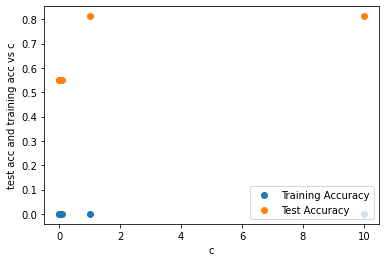

In [325]:
plt.grid()
plt.xlabel("c")
plt.ylabel("test acc and training acc vs c")
plt.scatter(c_logreg, acc_test_logreg)
plt.grid()
plt.scatter(c_logreg, acc_train_logreg)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# SVM with Linear Kernel

In [326]:

def svm_linear(c):
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(X_train, Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    c_svm_linear.append(c)


In [327]:
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.550000
Test Accuracy = 0.000000
Train Accuracy = 0.837500
Test Accuracy = 0.000000
Train Accuracy = 0.825000
Test Accuracy = 0.000000
Train Accuracy = 0.887500
Test Accuracy = 0.000000
Train Accuracy = 0.987500
Test Accuracy = 0.000000
Train Accuracy = 0.975000
Test Accuracy = 0.000000


<ipython-input-326-88ef431e39ff>:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_test = np.mean(Yhat_svc_linear_test == Y_test)
<ipython-input-326-88ef431e39ff>:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_test = np.mean(Yhat_svc_linear_test == Y_test)
<ipython-input-326-88ef431e39ff>:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_test = np.mean(Yhat_svc_linear_test == Y_test)
<ipython-input-326-88ef431e39ff>:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_test = np.mean(Yhat_svc_linear_test == Y_test)
<ipython-input-326-88ef431e39ff>:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_test = np.mean(Yhat_svc_linear_test == Y_test)
<ipython-input-326-88ef431e39ff>:9: DeprecationWarning: elementwise comparison failed; this will rai